1. Задача о светофоре. Обучение на 1 точке данных

In [ ]:
import numpy as np
weights = np.array([0.5,0.48,-0.7]) # начальные веса
learning_rate = 0.1

#набор данных, состоящий из 6 наблюдений
streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )
#метки класса для 6 наблюдений
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] #  0 - стоять, 1 - идти

for iteration in range(10):
    prediction = input.dot(weights)
    error = (prediction - goal_prediction) ** 2

    weight_corrections = 2* (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
    print("Weight corrections: "+ str(weight_corrections))

    weights = weights - (learning_rate *  weight_corrections)

    print("Error:" + str(error) + " Prediction:" + str(prediction))

Weight corrections: [-0.4 -0.  -0.4]
Error:0.03999999999999998 Prediction:-0.19999999999999996
Weight corrections: [-0.24 -0.   -0.24]
Error:0.014399999999999972 Prediction:-0.11999999999999988
Weight corrections: [-0.144 -0.    -0.144]
Error:0.005183999999999977 Prediction:-0.07199999999999984
Weight corrections: [-0.0864 -0.     -0.0864]
Error:0.0018662399999999919 Prediction:-0.043199999999999905
Weight corrections: [-0.05184 -0.      -0.05184]
Error:0.000671846399999997 Prediction:-0.025919999999999943
Weight corrections: [-0.031104 -0.       -0.031104]
Error:0.00024186470400000033 Prediction:-0.01555200000000001
Weight corrections: [-0.0186624 -0.        -0.0186624]
Error:8.707129344000177e-05 Prediction:-0.009331200000000095
Weight corrections: [-0.01119744 -0.         -0.01119744]
Error:3.134566563840064e-05 Prediction:-0.005598720000000057
Weight corrections: [-0.00671846 -0.         -0.00671846]
Error:1.1284439629823931e-05 Prediction:-0.0033592319999999898
Weight corrections:

2. Задача о светофоре.Реализуйте стохастический градиентный спуск на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration.

In [ ]:
import numpy as np
import random

weights = np.array([0.5,0.48,-0.7])
learning_rate = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )
error_ = []

n = 100

i = np.linspace(1, n, n)

for iteration in range(n):
    r = random.randint(0, 5) # генерация случайного числа от 0 до 5 для стохастического ГС
    input = streetlights[r] # [1,0,1] берем значения весов каждого набора цветов и его значение
    goal_prediction = walk_vs_stop[r]

    prediction = input.dot(weights)
    error = (prediction - goal_prediction) ** 2
    error_.append(error)

    weight_corrections = 2* (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
    #print("Weight corrections: "+ str(weight_corrections))

    weights = weights - (learning_rate *  weight_corrections)

    print("Error:" + str(error) + " Prediction:" + str(prediction))
print("Weights:" + str(weights))

Error:1.4884 Prediction:-0.21999999999999997
Error:0.0019360000000000035 Prediction:0.04400000000000004
Error:0.54878464 Prediction:0.2592
Error:0.1975624704 Prediction:0.55552
Error:0.07112248934399996 Prediction:0.7333120000000001
Error:0.10968496144384 Prediction:1.3311872
Error:0.0579094577299456 Prediction:-0.24064384
Error:0.05971127787382376 Prediction:0.755641088
Error:0.07914053189838831 Prediction:0.2813192704
Error:0.028490591483419783 Prediction:0.16879156223999997
Error:0.009663456165963322 Prediction:1.098302879744
Error:0.0641740785277759 Prediction:-0.2533260320768
Error:0.012683037327959164 Prediction:0.11261899186176
Error:0.050708114901240255 Prediction:-0.225184624033792
Error:0.04111986336067778 Prediction:0.7972196672241665
Error:0.023459329285482677 Prediction:0.15316438647898106
Error:0.02319561804357075 Prediction:0.8476989230387035
Error:0.014971687507604201 Prediction:0.12235884727964791
Error:0.01483498586938699 Prediction:1.1217989567664148
Error:0.02708394

Text(0, 0.5, 'error')

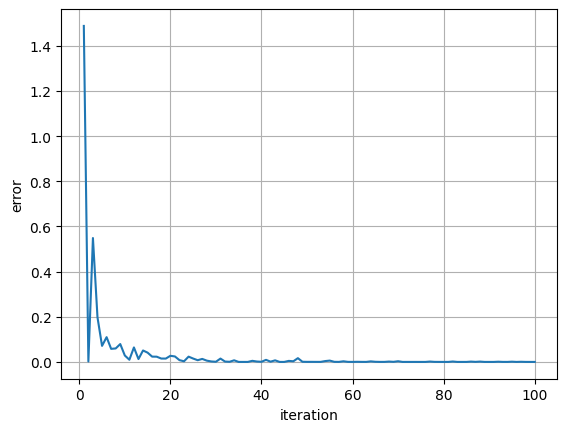

In [ ]:
import matplotlib.pyplot as plt
x = i
y = np.array(error_)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('error')

3. Попробуйте получить прогноз для какого-нибудь примера на ваше усмотрение. Попробуйте получить прогноз для какого-нибудь примера, где яркость секций светоыора измеряется от 0 до 1. Например, [0.9, 0.1, 0.7]. Сделайте выводы о полученных прогнозах сети.

In [ ]:
input = np.array([0.9, 0.1, 0.7]) # подстановка значений из примера
prediction = input.dot(weights)
print(prediction)

0.11101665430698253


Ближе к 0, значит переходить по дороге не стоит.

4. Реализуйте полный градиентный спуск или стохастический градиентный спуск по мини-батчам (размер батча = 2) на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration.

In [ ]:
import numpy as np
import random

weights = np.array([0.5,0.48,-0.7])
learning_rate = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )
error_ = []

mean_weight_corrections = 0

n = 10

i = np.linspace(1, n, n)
for iteration in range(n):
  sum_weight_corrections = np.array([0,0,0]) # Суммарные веса
  sum_error = np.array([0,0,0]) # Суммарная ошибка

  prediction = streetlights.dot(weights)

  error = (prediction - walk_vs_stop) ** 2
  error = error.mean()
  weight_corrections = (2*(prediction -  walk_vs_stop) / len(prediction)).dot(streetlights) #получаем вектор из 3х величин для коррекции 3х весов
  #print("Weight corrections: "+ str(weight_corrections))
  sum_weight_corrections = sum_weight_corrections + weight_corrections
  print("Error:" + str(error) + " Prediction:" + str(prediction))

  weights = weights - (learning_rate *  weight_corrections)

  error_.append(error)
  print('================================================')
  print("Weights:" + str(weights))

Error:0.6775333333333333 Prediction:[-0.2  -0.22 -0.7   0.28 -0.22 -0.2 ]
Weights:[ 0.53733333  0.58533333 -0.558     ]
Error:0.3989823703703703 Prediction:[-0.02066667  0.02733333 -0.558       0.56466667  0.02733333 -0.02066667]
Weights:[ 0.55322222  0.66468889 -0.45866667]
Error:0.2578368796707819 Prediction:[ 0.09455556  0.20602222 -0.45866667  0.75924444  0.20602222  0.09455556]
Weights:[ 0.5549437   0.72564593 -0.38872444]
Error:0.18290062660374937 Prediction:[ 0.16621926  0.33692148 -0.38872444  0.89186519  0.33692148  0.16621926]
Weights:[ 0.54746691  0.77345565 -0.33903852]
Error:0.1403213414982968 Prediction:[ 0.2084284   0.43441714 -0.33903852  0.98188405  0.43441714  0.2084284 ]
Weights:[ 0.53417555  0.81176504 -0.30332307]
Error:0.11394424409100597 Prediction:[ 0.23085248  0.50844197 -0.30332307  1.04261752  0.50844197  0.23085248]
Weights:[ 0.5173648   0.84311499 -0.27725252]
Error:0.09600905572448903 Prediction:[ 0.24011229  0.56586248 -0.27725252  1.08322728  0.56586248 

[0.6775333333333333, 0.3989823703703703, 0.2578368796707819, 0.18290062660374937, 0.1403213414982968, 0.11394424409100597, 0.09600905572448903, 0.08274387800974069, 0.0722774966219206, 0.06364945477685387]


Text(0, 0.5, 'error')

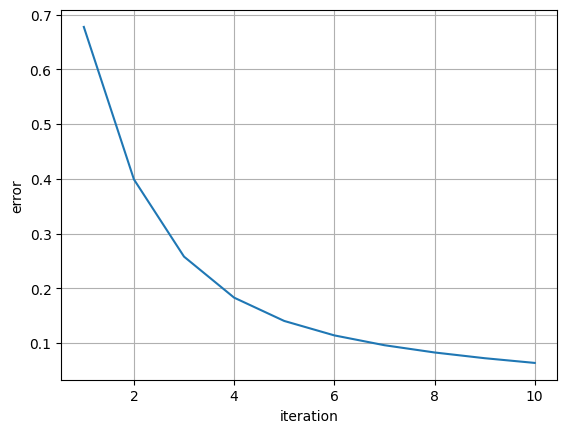

In [ ]:
import matplotlib.pyplot as plt
x = i
y = np.array(error_)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('error')